In [2]:
from fenics import *

In [3]:
#create a mesh
mesh = UnitSquareMesh(8,8)
"""
"CG": Lagrange polynomials; CG stands for continuous galerkin
1: the order the basis functions
"""
V = FunctionSpace(mesh, "CG", 2)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [4]:
"""
Define our Dirichlet boundary conditions

u_D(x,y) = 1 + x^2 + 2y^2

We need to write the formula using C++ syntax

degree: usually put degree to be the same as the basis functions degree
        but if u_D is an exact solution used to evaluate accuracy we should set
        it to 1 to 2 degrees higher than the degree of the basis functions


we can specify if else statements using condition operator

if A:
    B
else:
    C

is equivalent to 

A ? B : C;

we can also specify constants:

f = Expression(’exp(-kappa*pow(pi, 2)*t)*sin(pi*k*x[0])’, 
                degree=2, kappa=1.0, t=0, k=4)
"""
u_D = Expression('1+x[0]*x[0] + 2*x[1]*x[1]', degree=2)

In [5]:
def boundary(x, on_boundary):
    """
    on boundary is a special argument. Fenics shares the information of whether a 
    point is actually on the physical boundary in this variable

    If we omit on_boundary, then we have to check manually:
    
    near is a fenics function
    tol is some specified tolerance; for examplep: tol = 1E-14

    return near(x[0], 0, tol) or near(x[1], 0, tol) \
            or near(x[0], 1, tol) or near(x[1], 1, tol) 

    The following is a BAD example; we shouldn't comparing floating points:

    x[0] == 0 or x [1] == 0 or x[0] == 1 or x[1] == 1 
    """
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [6]:
# say that the trial solution is made of basis functions from the space V
u = TrialFunction(V)
# named ``v", but really they are the weighting functions w we are familiar with
v = TestFunction(V)
# forcing; we could have also used f = Expression("-6", degree=0)
f = Constant(-6.0)
# the bilinear form
# there is another function called inner
a = dot(grad(u), grad(v))*dx
# linear form
L = f*v*dx

In [7]:
# compute solution
u = Function(V)
solve(a==L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


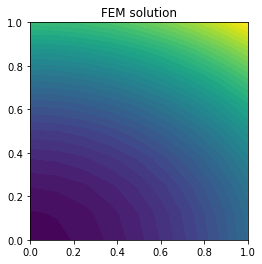

In [8]:
# we can also use paraview to look at our solution
plot(u,title = "FEM solution")

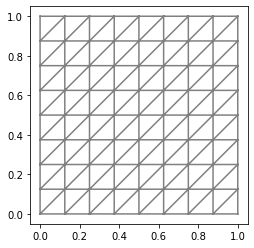

In [9]:
plot(mesh)

In [10]:
# L2 norm error, but there are other error options
error_L2 = errornorm(u_D, u, "L2")

vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [11]:
print("error_L2 =", error_L2)
print("error_max =", error_max)

error_L2 = 3.343395878065277e-14
error_max = 5.551115123125783e-14


In [80]:
vtkfile = File('poisson.pvd')
vtkfile << u

In [18]:
# let's grab the degree of freedom value from u
# cast as a numpy array
nodal_dofs = np.array(u.vector())
nodal_dofs.shape

(289,)

In [ ]:
# field value at the nodes
u.compute_vertex_values()